## Assignment 3

**Part (A) Metric multidimensional scaling:**

In [86]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
import seaborn as sns
from tabulate import tabulate
from scipy.spatial.distance import cdist
from sklearn.manifold import MDS
from factor_analyzer import FactorAnalyzer
from sklearn.metrics import euclidean_distances
import matplotlib.pyplot as plt

In [87]:
cars_od = pd.read_csv("cars.dissimilarity.csv", sep=",", index_col=0)
cars_ar = pd.read_csv("cars.ar.csv", sep=",", index_col=0)

In [88]:
mds = MDS(n_components=2, metric=True, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
mds_fit_out = mds.fit(cars_od)

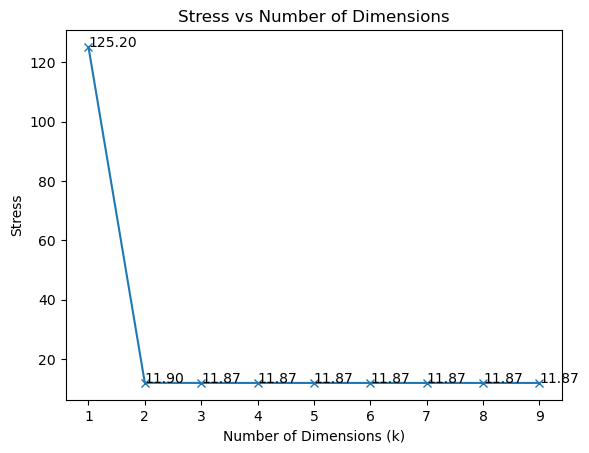

In [89]:

bof_measures = []

for k in range(1, 10):
    mds = MDS(n_components=k, metric=True, max_iter=1000,eps=1e-9, dissimilarity="precomputed", n_jobs=1)
    mds_fit_out = mds.fit(cars_od)
    stress = mds_fit_out.stress_
    bof_measures.append(stress)

# Plot the GOF measure for each value of k
plt.plot(range(1, 10), bof_measures, marker='x')
plt.xlabel('Number of Dimensions (k)')
plt.ylabel('Stress')
plt.title('Stress vs Number of Dimensions')
for i, stress in enumerate(bof_measures[:9]):
    plt.text(i+1, stress, f"{stress:.2f}")
plt.show()




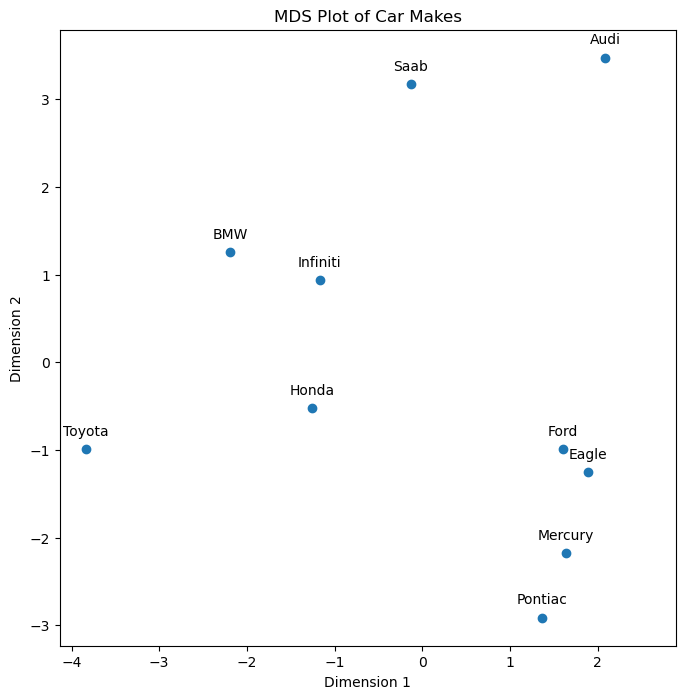

In [95]:

mds = MDS(n_components=2, metric=True, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
mds_fit_out = mds.fit(cars_od)


embedding = mds_fit_out.embedding_
product_names = cars_ar.index

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1])

for i, product in enumerate(product_names):
    plt.annotate(product, (embedding[i, 0], embedding[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('MDS Plot of Car Makes')
plt.axis('square') 
plt.show()



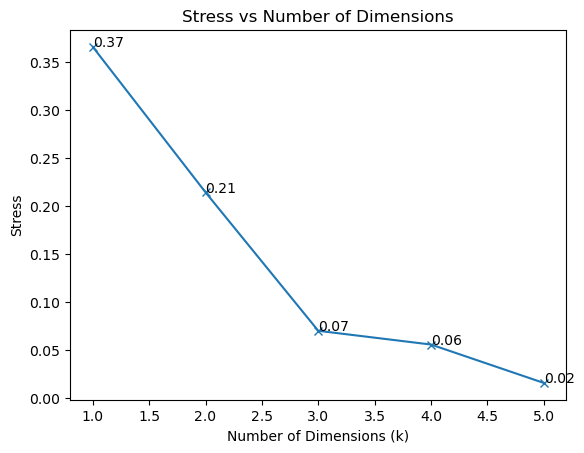

In [96]:


bof_measures = []

for k in range(1, 6):
    mds = MDS(n_components=k, metric=False,max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
    mds_fit_out = mds.fit(cars_od)
    stress = mds_fit_out.stress_
    bof_measures.append(stress)

# Plot the GOF measure for each value of k
plt.plot(range(1, 6), bof_measures, marker='x')
plt.xlabel('Number of Dimensions (k)')
plt.ylabel('Stress')
plt.title('Stress vs Number of Dimensions')
for i, stress in enumerate(bof_measures[:5]):
    plt.text(i+1, stress, f"{stress:.2f}")
plt.show()

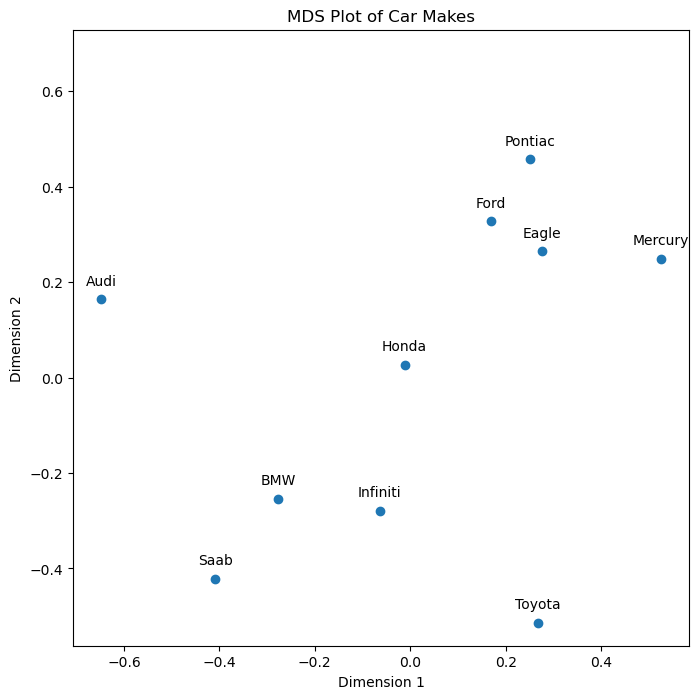

In [99]:

mds = MDS(n_components=2, metric=False, max_iter=1000,eps=1e-9, dissimilarity="precomputed", n_jobs=1)
mds_fit_out = mds.fit(cars_od)

# Plot products at their coordinates
embedding = mds_fit_out.embedding_
product_names = cars_ar.index

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1])

for i, product in enumerate(product_names):
    plt.annotate(product, (embedding[i, 0], embedding[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('MDS Plot of Car Makes')
plt.axis('square') 
plt.show()

Part c

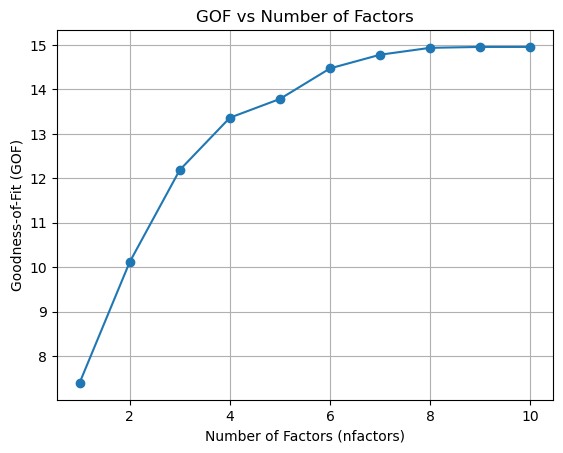

In [98]:
gof_measures = []

for nfactors in range(1, 11):
    fa = FactorAnalyzer(n_factors=nfactors, rotation=None)
    fa_fit_out = fa.fit(cars_ar)
    fa_communalities = fa_fit_out.get_communalities()
    gof = sum(fa_communalities)
    gof_measures.append(gof)

# Plot the GOF measure for each value of nfactors
plt.plot(range(1, 11), gof_measures, marker='o')
plt.xlabel('Number of Factors (nfactors)')
plt.ylabel('Goodness-of-Fit (GOF)')
plt.title('GOF vs Number of Factors')
plt.grid(True)
plt.show()



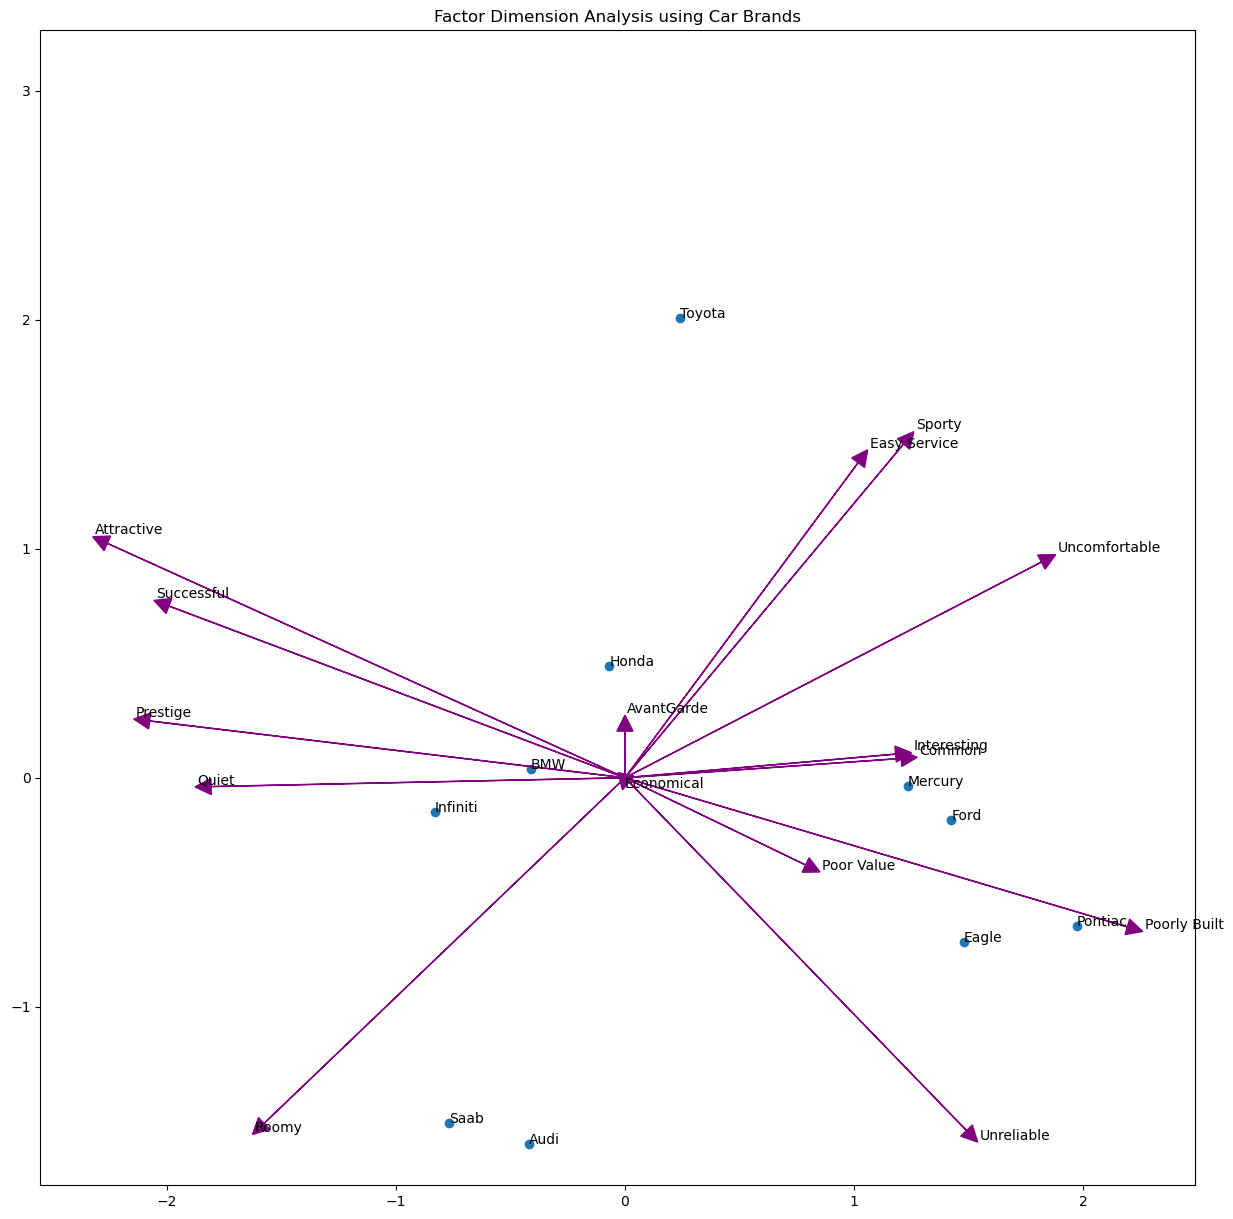

In [94]:
arrowscale = 2.5
arrow_origin_x = 0
arrow_origin_y = 0

fa = FactorAnalyzer(n_factors=2, rotation=None)
fa_fit_out = fa.fit(cars_ar)
fa_gof = sum(fa_fit_out.get_communalities())
fa_scores = fa_fit_out.transform(cars_ar)
fa_factor_loadings = fa_fit_out.loadings_

products= np.array(cars_ar.index)
attributes = np.array(cars_ar.columns)

fig, axis = plt.subplots(figsize = (15,15))
axis.scatter(fa_scores[:, 0], fa_scores[:, 1])

for i, name in enumerate(products):
    axis.annotate(name, (fa_scores[i, 0], fa_scores[i, 1]))

for i in range(len(attributes)):
    betax = fa_factor_loadings[i,0]
    betay = fa_factor_loadings[i,1]
    R2_val = fa_fit_out.get_communalities()[i]
    arrowlabel = attributes[i]
    arrow_end_x = arrowscale* R2_val*betax/np.sqrt(betax**2+betay**2)
    arrow_end_y = arrowscale* R2_val*betay/np.sqrt(betax**2+betay**2)
    axis.arrow(arrow_origin_x,arrow_origin_y,arrow_end_x-arrow_origin_x, arrow_end_y-arrow_origin_y, 
             length_includes_head=True, head_width=0.07, head_length=0.07, color = 'purple')
    axis.annotate(arrowlabel, (arrow_end_x+0.01, arrow_end_y+0.01))
    
plt.axis('square')
plt.title("Factor Dimension Analysis using Car Brands")
plt.show()
